In [1]:
import glob
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd
#from PIL import Image

## Mean image calculation

### Convert images to grey scale

In [2]:
# we were working with images of the size 200 times 200 pixels 

def img_to_grayscale(im):
    arr = np.empty((200, 200, 1))   # TODO: maybe chnage according to assignment 
    for i, e in enumerate(np.array(im)):
        for j, l in enumerate(e):
            arr[i][j] = l[0]
    return arr

In [3]:
# the Data_df['Image'] contain the path of the image
# we are reading the image and converting it to grayscale

# Maybe make a pandas df with the image path

image_data = []

import glob, os
data_path = "../Assignment_2/"
os.chdir(data_path)

for img in glob.glob("*.jpg"):
    this_image = cv2.imread(img)
    image_data.append(img_to_grayscale(np.array(this_image)))

### Mean image 


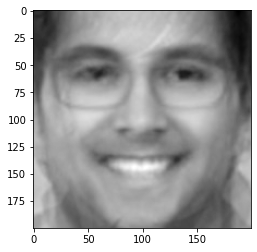

In [4]:
mean_image = np.mean(image_data, axis=(0))
mean_image = mean_image.astype(int)
plt.imshow(mean_image, cmap="gray")
plt.show()

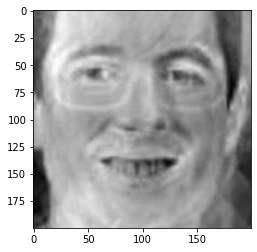

In [5]:
without_mean = np.subtract(image_data, mean_image)
plt.imshow(without_mean[0], cmap="gray")
plt.show()

# PCA

In [6]:
from sklearn.decomposition import PCA

for_pca = np.reshape(without_mean, (without_mean.shape[0], -1))
N_COMPONENTS = 10  # TODO: maybe chnage according to assignment 

pca = PCA(N_COMPONENTS)
pc_scores = pca.fit_transform(for_pca)

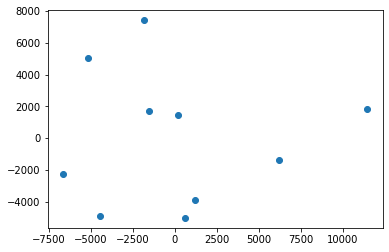

In [7]:
plt.scatter(pc_scores[:,0], pc_scores[:,1]) 
plt.show()

In [8]:
pc_scores_df = pd.DataFrame(data = pc_scores)
pca.explained_variance_ratio_

array([3.49486111e-01, 2.09471764e-01, 1.21969088e-01, 9.63887628e-02,
       6.62111700e-02, 5.47405166e-02, 3.97268906e-02, 3.58871123e-02,
       2.61185842e-02, 3.71395651e-31])

In [9]:
maximage=[]
minimage=[]

pcmax = pc_scores.max(0)
pcmin = pc_scores.min(0)

for i,col in enumerate(pc_scores.T):
    maximage.append(np.dot(pcmax[i],pca.components_[i]))
    minimage.append(np.dot(pcmin[i],pca.components_[i]))
    
maximage_reshaped = np.reshape(maximage,(N_COMPONENTS,200,200,1))
minimage_reshaped = np.reshape(minimage,(N_COMPONENTS,200,200,1))

pca_visual = mean_image + maximage_reshaped - minimage_reshaped

### PCA images

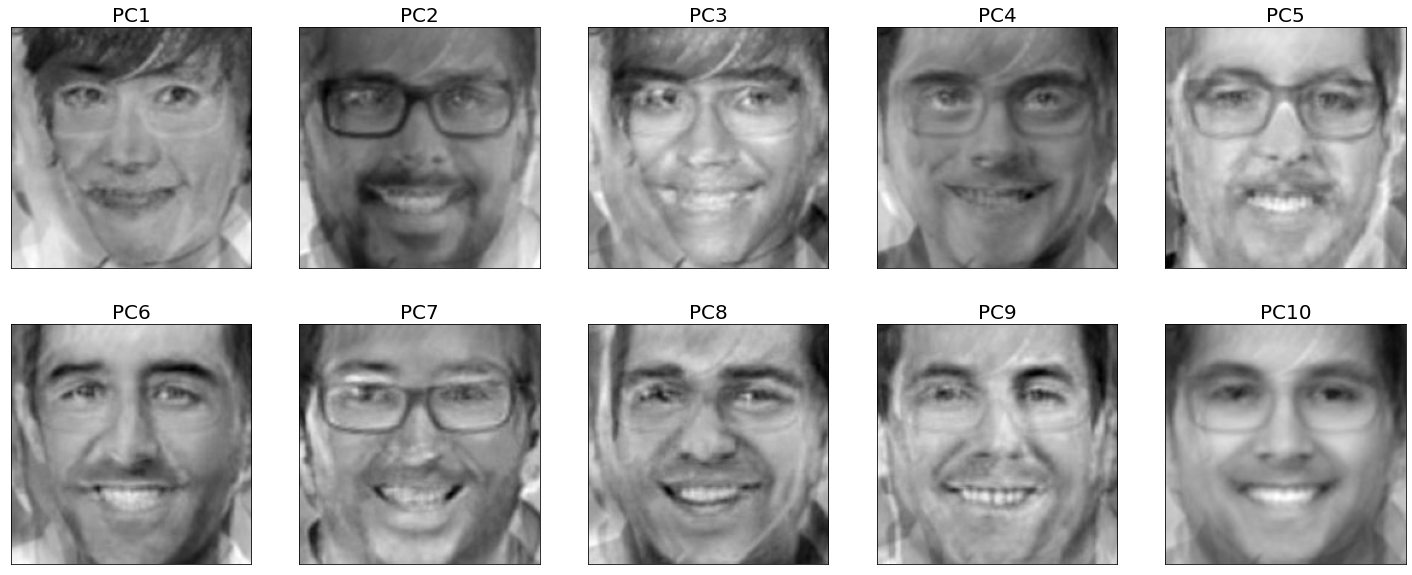

In [10]:
fig = plt.figure(figsize=(25, 10))
for i,img in enumerate(pca_visual):
    plt.subplot(2,int(N_COMPONENTS/2),i + 1)
    axs = plt.imshow(pca_visual[i], cmap="gray")
    plt.title('PC'+str(i+1),fontsize = 20)
    axs.axes.get_xaxis().set_visible(False)
    axs.axes.get_yaxis().set_visible(False)
# fig.savefig('pca_faces.png')

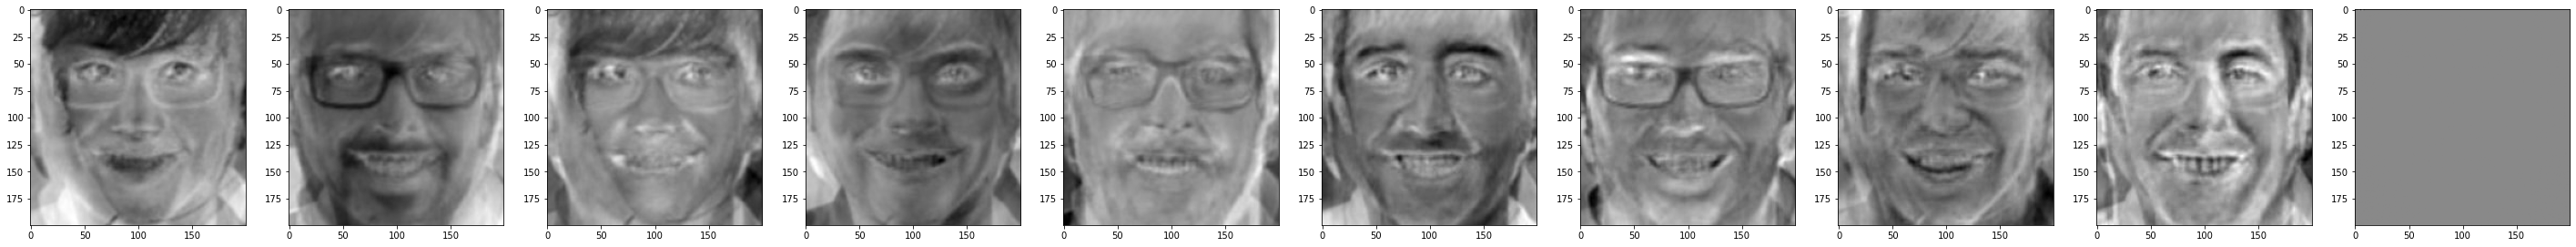

In [11]:
reshaped_pcs = np.reshape(pca.components_, (N_COMPONENTS, 200, 200, 1)) * 10000

plt.figure(figsize=(50, 30))
for i,img in enumerate(reshaped_pcs):
    plt.subplot(1,N_COMPONENTS,i + 1)
    plt.imshow(reshaped_pcs[i], cmap='gray')
    # plt.savefig("pc_features.jpg")

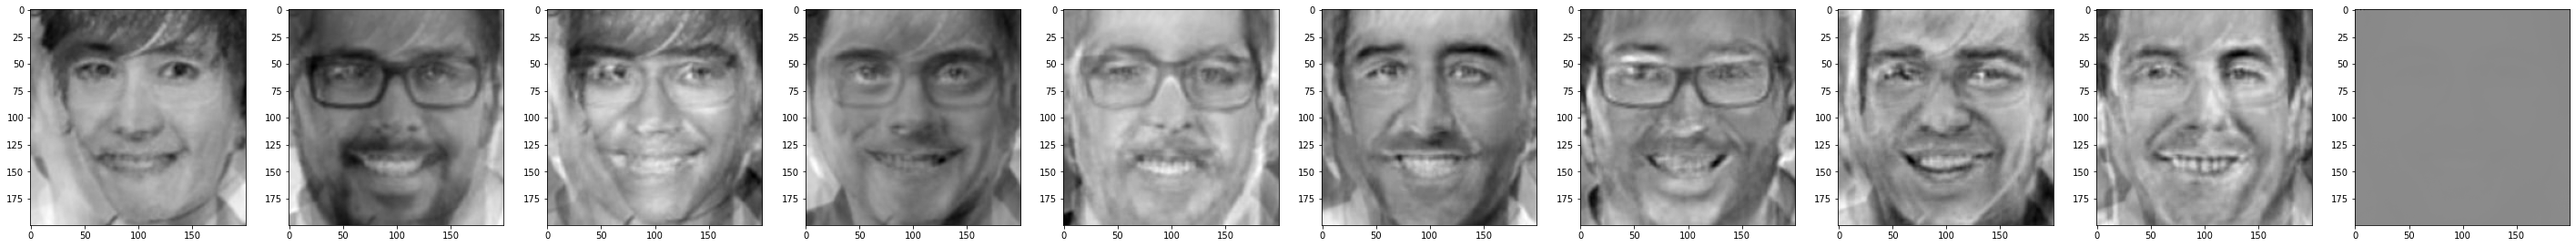

In [12]:
plt.figure(figsize=(50, 30))
for i,img in enumerate(reshaped_pcs):
    plt.subplot(1,N_COMPONENTS,i + 1)
    plt.imshow(reshaped_pcs[i] + mean_image, cmap='gray')

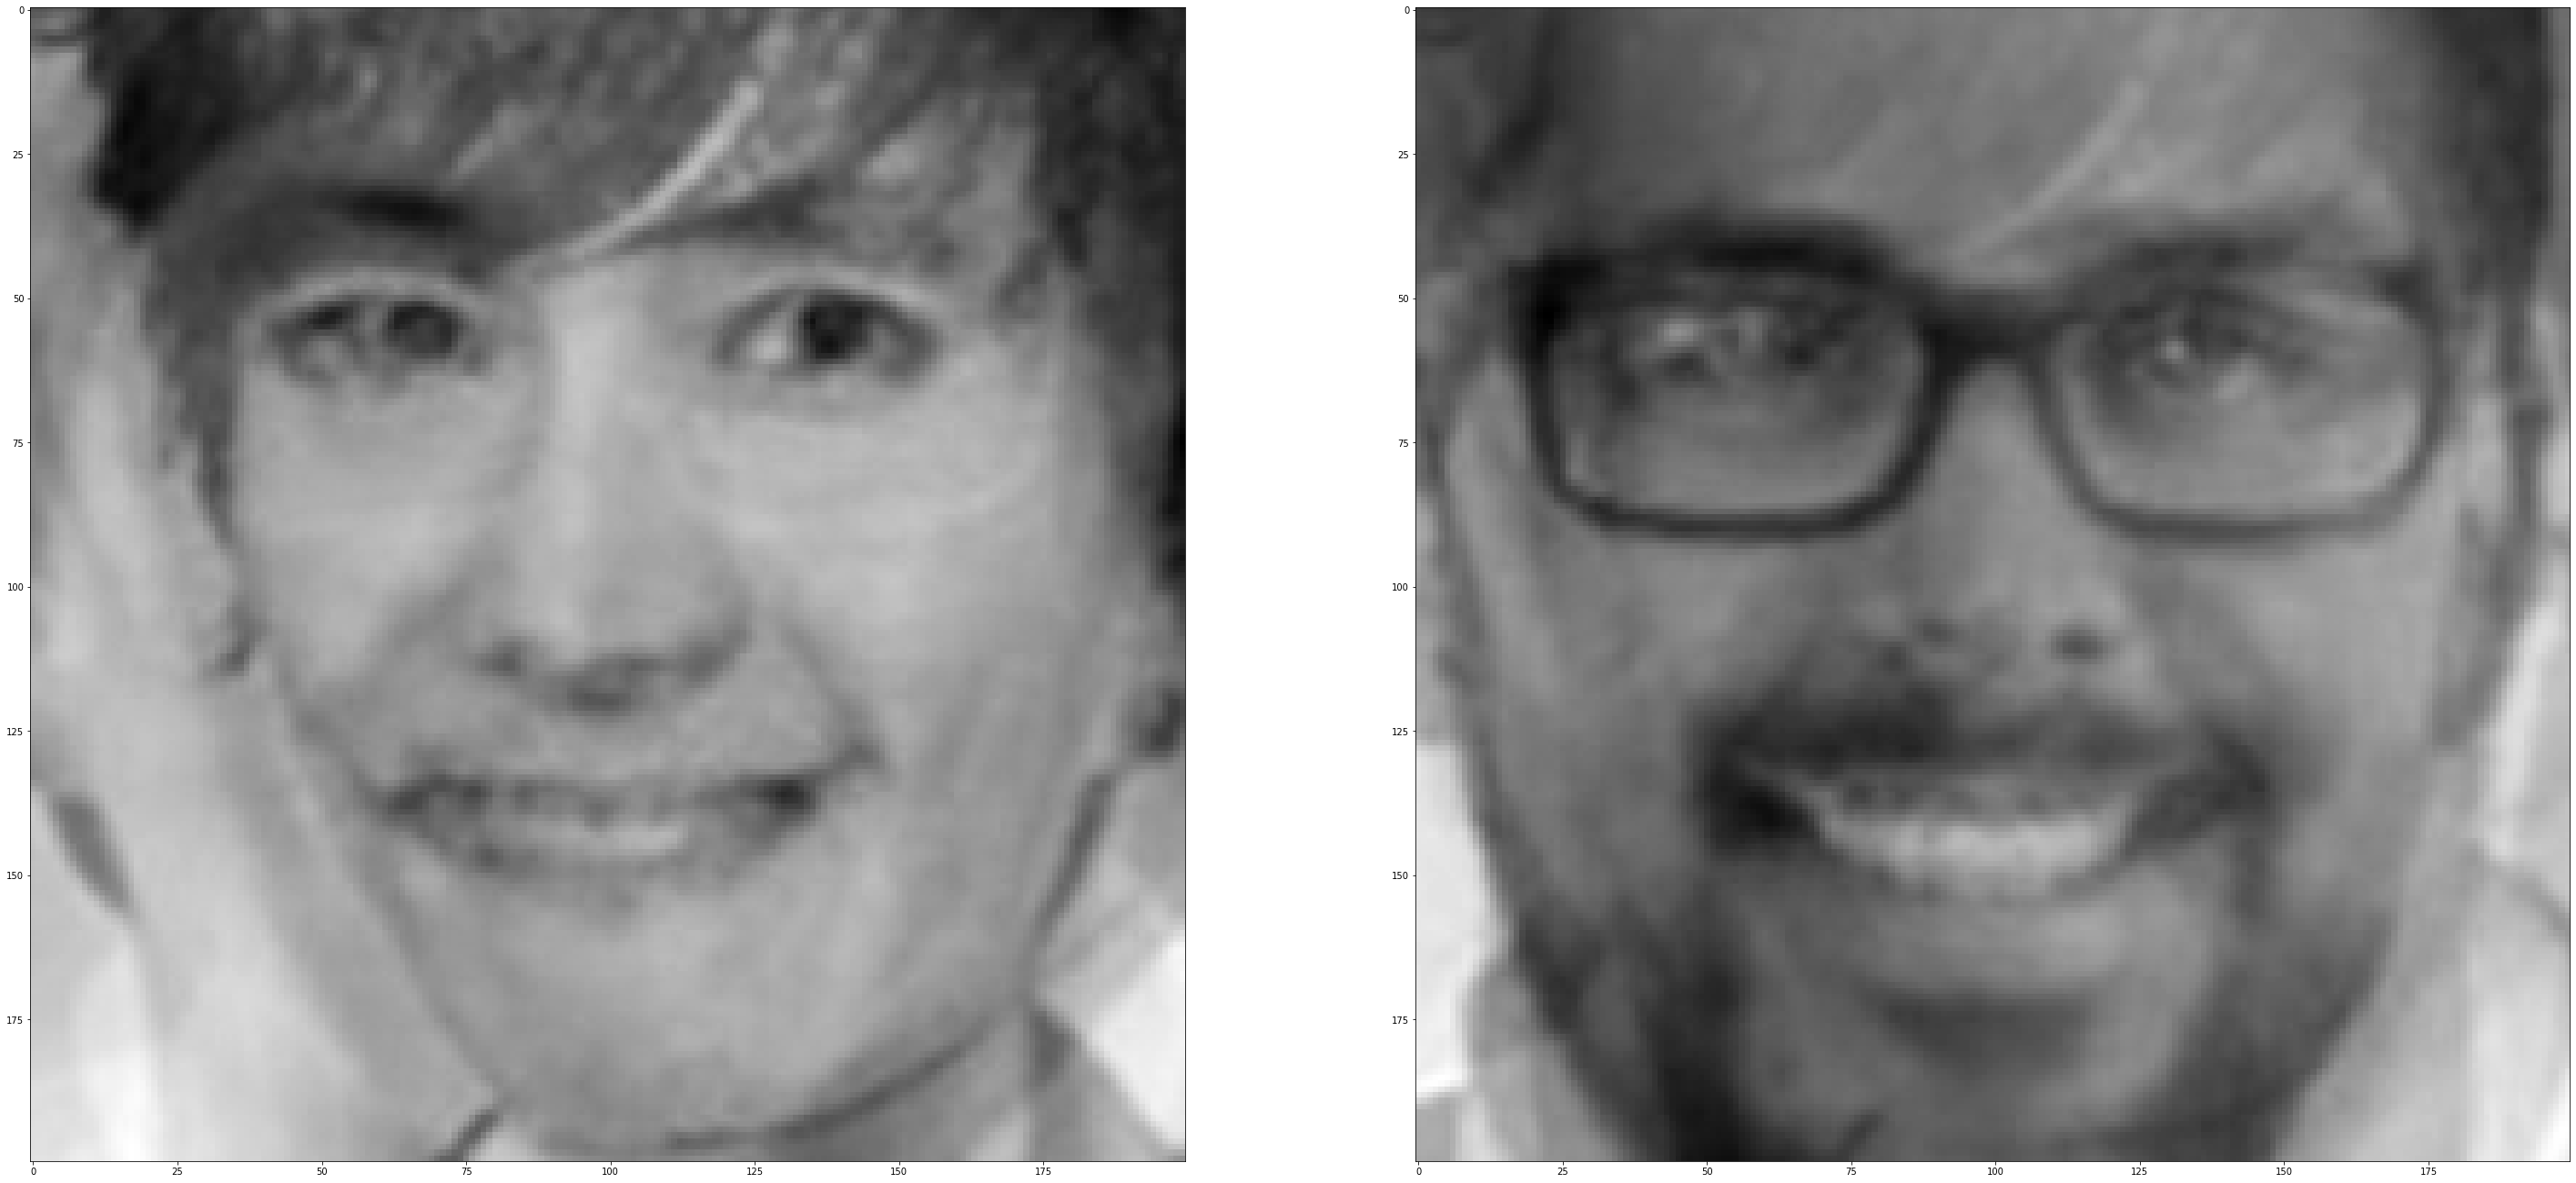

In [13]:
plt.figure(figsize=(50, 30))
plt.subplot(1,2,1)
plt.imshow(reshaped_pcs[0] + mean_image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(reshaped_pcs[1] + mean_image, cmap='gray')

[0.         0.34948611 0.55895788 0.68092696 0.77731573 0.8435269
 0.89826741 0.9379943  0.97388142 1.         1.        ]


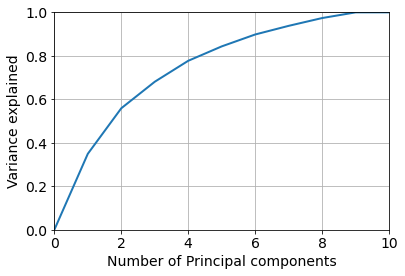

In [14]:
plt.plot(list(range(0,11)),np.append(0,np.array(np.cumsum(pca.explained_variance_ratio_))),linewidth = 2)
plt.xlabel('Number of Principal components',fontsize=14) 
plt.ylabel('Variance explained',fontsize=14) 
plt.xticks(fontsize=14); plt.yticks(fontsize = 14)
plt.xlim(0,10) 
plt.ylim(0,1) 
plt.grid()
# plt.savefig('./variance_explained.png')
print(np.append(0,np.array(np.cumsum(pca.explained_variance_ratio_))))

## PC's variance 

In [15]:
# each of the pca's explained variance 
print("The first 6 components return " + str(pca.explained_variance_ratio_) + " of variance")

# cummulative variance 
print("The first 6 components return " + str(np.sum(pca.explained_variance_ratio_)) + " of variance")

The first 6 components return [3.49486111e-01 2.09471764e-01 1.21969088e-01 9.63887628e-02
 6.62111700e-02 5.47405166e-02 3.97268906e-02 3.58871123e-02
 2.61185842e-02 3.71395651e-31] of variance
The first 6 components return 0.9999999999999999 of variance


# Linear regression

In [18]:
# read txt file and make it a pandas dataframe
with open('ratings.txt') as f:
    lines = f.readlines()
    
ratings_df = pd.DataFrame([sub.split() for sub in lines])
ratings_df.columns = [ 'Rating']


In [19]:
#from statistics import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import utils
import numpy as np
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


X = pc_scores_df
y = ratings_df.Rating


# Build RF classifier to use in feature selection
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=7,
           forward=True,
           floating=False,
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=10)

#classifier = MultiOutputClassifier(sfs1, n_jobs=-1)
sfs1 = sfs1.fit(X, y)
# Which features?
feat_cols = list(sfs1.k_feature_idx_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished

[2022-12-07 10:31:09] Features: 1/7 -- score: -1.7375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.6s finished

[2022-12-07 10:31:10] Features: 2/7 -- score: -1.8638424839240355[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s finished

[2022-12-07 10:31:11] Features: 3/7 -- score: -1.4730218003922952[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   

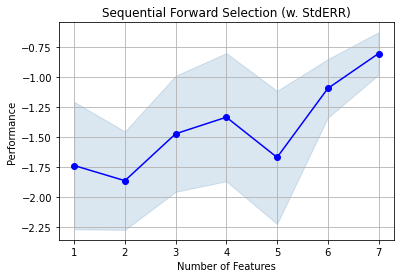

In [20]:
feat_cols
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_err')

#plt.ylim([0, -0.2])
plt.title('Sequential Forward Selection (w. StdERR)')
plt.grid()
plt.show()

## Get coefficients of the predictors 


In [21]:
#from statistics import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import utils
import numpy as np
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


lr_model = LinearRegression().fit(X[feat_cols],y) # replace the feat_cols with the amount of principals components for example
lr_model.coef_

array([ 8.50775056e-05,  1.75782442e-04,  2.47845206e-04, -4.98493947e-04,
        2.68602891e-04, -4.67986309e-04, -1.20695082e-19])

In [22]:
# get intercept coeff
lr_model.intercept_

2.999999999999998